In [1]:
import pandas as pd
df1 = pd.read_csv('unemployment.csv')
df2 = pd.read_csv('happiness2019.csv')

In [2]:
df1.head() # Unemployment per year by country

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [3]:
df2.head() # Happiness and other statistics by country (2019)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
## Dropping all years except 2019 for df1
df1 = df1[['Country Name', 'Country Code', '2019']]
df1.head()

,Country Name,Country Code,2019
0,Africa Eastern and Southern,AFE,6.91
1,Afghanistan,AFG,11.22
2,Africa Western and Central,AFW,6.06
3,Angola,AGO,7.42
4,Albania,ALB,11.47


In [5]:
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
# Check for null and duplicates

print("df1: Unemployment \n-----------------")
print(df1.isnull().sum())
print("Duplicates: ", df1.duplicated().sum())

print("\ndf2: Happiness \n-----------------")
print(df2.isnull().sum())
print("Duplicates: ", df2.duplicated().sum())

df1: Unemployment 
-----------------
Country Name    0
Country Code    0
2019            0
dtype: int64
Duplicates:  0

df2: Happiness 
-----------------
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Duplicates:  0


In [7]:
# Dropping column

df2 = df2.drop(['Overall rank'], axis=1)
df2.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
# Check for number of countries

df1.rename(columns={'Country Name': 'Country'}, inplace=True)
df2.rename(columns={'Country or region': 'Country'}, inplace=True)

print("# Countries df1: ", len(df1))
print("# Countries df2: ", len(df2))
print("# Unique countries df1: ", len(df1['Country'].unique()))
print("# Unique countries df2: ", len(df2['Country'].unique()))

# Datatype of 'Country' columns

print(df1['Country'].dtype, df2['Country'].dtype)


# Countries df1:  235
# Countries df2:  156
# Unique countries df1:  235
# Unique countries df2:  156
object object


In [9]:
df1['Country'] = df1['Country'].str.strip().str.lower()
df2['Country'] = df2['Country'].str.strip().str.lower()

df2.head()

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [10]:
missing_in_df1 = set(df2['Country']) - set(df1['Country'])
print("Countries in df2 and not in df1: ", missing_in_df1)
print("Total missing countries:", len(missing_in_df1))

print()

missing_in_df2 = set(df1['Country']) - set(df2['Country'])
print("Countries in df1 and not in df2: ", missing_in_df2)
print("Total missing countries:", len(missing_in_df2))

print()

common_countries = set(df1['Country']).intersection(set(df2['Country']))
print("Countries in both df1 and df2:", common_countries)
print("Total common countries:", len(common_countries))

Countries in df2 and not in df1:  {'russia', 'congo (kinshasa)', 'trinidad & tobago', 'taiwan', 'hong kong', 'slovakia', 'northern cyprus', 'laos', 'kosovo', 'gambia', 'kyrgyzstan', 'swaziland', 'yemen', 'egypt', 'turkey', 'ivory coast', 'venezuela', 'iran', 'palestinian territories', 'congo (brazzaville)', 'south korea', 'syria'}
Total missing countries: 22

Countries in df1 and not in df2:  {'ibrd only', 'venezuela, rb', 'lower middle income', 'guyana', 'guam', 'iran, islamic rep.', 'virgin islands (u.s.)', 'east asia & pacific (ida & ibrd countries)', 'middle east & north africa (excluding high income)', 'heavily indebted poor countries (hipc)', 'maldives', 'sub-saharan africa (excluding high income)', 'west bank and gaza', 'suriname', 'french polynesia', 'solomon islands', 'st. vincent and the grenadines', 'latin america & the caribbean (ida & ibrd countries)', 'gambia, the', 'sub-saharan africa', 'timor-leste', 'european union', 'angola', 'caribbean small states', 'middle east & n

In [11]:
# Mapping inconsistent country names between df2 and df1
country_mapping = {
    'congo (brazzaville)': 'congo, rep.',
    'congo (kinshasa)': 'congo, dem. rep.',
    'ivory coast': "cote d'ivoire",
    'russia': 'russian federation',
    'south korea': 'korea, rep.',
    'north korea': "korea, dem. people's rep.",
    'egypt': 'egypt, arab rep.',
    'venezuela': 'venezuela, rb',
    'iran': 'iran, islamic rep.',
    'laos': 'lao pdr',
    'slovakia': 'slovak republic',
    'turkey': 'turkiye',
    'gambia': 'gambia, the',
    'syria': 'syrian arab republic',
    'trinidad & tobago': 'trinidad and tobago',
    'eswatini': 'swaziland',
    'hong kong': 'hong kong sar, china',
    'palestinian territories': 'west bank and gaza',
    'kyrgyzstan': 'kyrgyz republic',
}

df2['Country'] = df2['Country'].replace(country_mapping)

In [12]:
missing_in_df1 = set(df2['Country']) - set(df1['Country'])
print("Countries in df2 and not in df1: ", missing_in_df1)
print("Total missing countries:", len(missing_in_df1))

print()

missing_in_df2 = set(df1['Country']) - set(df2['Country'])
print("Countries in df1 and not in df2: ", missing_in_df2)
print("Total missing countries:", len(missing_in_df2))

print()

common_countries = set(df1['Country']).intersection(set(df2['Country']))
print("Countries in both df1 and df2:", common_countries)
print("Total common countries:", len(common_countries))

Countries in df2 and not in df1:  {'northern cyprus', 'yemen', 'taiwan', 'kosovo', 'swaziland'}
Total missing countries: 5

Countries in df1 and not in df2:  {'ibrd only', 'lower middle income', 'guyana', 'guam', 'virgin islands (u.s.)', 'east asia & pacific (ida & ibrd countries)', 'middle east & north africa (excluding high income)', 'heavily indebted poor countries (hipc)', 'maldives', 'sub-saharan africa (excluding high income)', 'suriname', 'french polynesia', 'solomon islands', 'st. vincent and the grenadines', 'latin america & the caribbean (ida & ibrd countries)', 'sub-saharan africa', 'timor-leste', 'european union', 'angola', 'caribbean small states', 'middle east & north africa (ida & ibrd countries)', 'eswatini', 'europe & central asia (excluding high income)', 'east asia & pacific (excluding high income)', 'latin america & caribbean (excluding high income)', 'eritrea', 'south asia (ida & ibrd)', 'macao sar, china', 'europe & central asia (ida & ibrd countries)', 'new caled

In [13]:
merged_df = pd.merge(df1, df2, on='Country', how='inner')
df = merged_df
df.head()

,Country,Country Code,2019,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,afghanistan,AFG,11.22,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,albania,ALB,11.47,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,united arab emirates,ARE,2.23,6.825,1.503,1.310,0.825,0.598,0.262,0.182
3,argentina,ARG,9.84,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,armenia,ARM,18.30,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [14]:
df.rename(columns={'2019': 'Unemployment Rate'}, inplace=True)
df.rename(columns={'Score' : 'Happiness Score'}, inplace=True)
df.head()

,Country,Country Code,Unemployment Rate,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,afghanistan,AFG,11.22,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,albania,ALB,11.47,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,united arab emirates,ARE,2.23,6.825,1.503,1.310,0.825,0.598,0.262,0.182
3,argentina,ARG,9.84,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,armenia,ARM,18.30,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [15]:
# Countries with Highest and Lowest Happiness Scores
print("Happiest countries")
print("-" * 40)
top_happy = df.nlargest(5, 'Happiness Score')
print(top_happy[['Country', 'Happiness Score']])
print("\nUnhappiest Countries")
print("-" * 40)
bottom_happy = df.nsmallest(5, 'Happiness Score')
print(bottom_happy[['Country', 'Happiness Score']])


print("\nHighest Unemployment")
print("-" * 40)
top_unem = df.nlargest(5, 'Unemployment Rate')
print(top_unem[['Country', 'Unemployment Rate']])
print("\nLowest Unemployment")
print("-" * 40)
bottom_unem = df.nsmallest(5, 'Unemployment Rate')
print(bottom_unem[['Country', 'Unemployment Rate']])




Happiest countries
----------------------------------------
         Country  Happiness Score
44       finland            7.769
36       denmark            7.600
105       norway            7.554
64       iceland            7.494
104  netherlands            7.488

Unhappiest Countries
----------------------------------------
                      Country  Happiness Score
127               south sudan            2.853
21   central african republic            3.083
0                 afghanistan            3.203
140                  tanzania            3.231
119                    rwanda            3.334

Highest Unemployment
----------------------------------------
                Country  Unemployment Rate
148        south africa              28.47
115  west bank and gaza              25.34
20             botswana              22.61
81              lesotho              22.44
46                gabon              20.74

Lowest Unemployment
----------------------------------------
      Co

In [16]:
avg_h = df['Happiness Score'].mean()
avg_e = df['Unemployment Rate'].mean()

print("Average Happiness: ", avg_h)
print("Average Unemployment Rate: ", avg_e)

Average Happiness:  5.414907284768212
Average Unemployment Rate:  6.925562913907286


In [17]:
country_list = df[df['Happiness Score'] > avg_h]
country_list = country_list['Country'].tolist()

print("Above average countries: ", country_list)

Above average countries:  ['united arab emirates', 'argentina', 'australia', 'austria', 'belgium', 'bahrain', 'bolivia', 'brazil', 'canada', 'switzerland', 'chile', 'colombia', 'costa rica', 'cyprus', 'czech republic', 'germany', 'denmark', 'dominican republic', 'ecuador', 'spain', 'estonia', 'finland', 'france', 'united kingdom', 'guatemala', 'hong kong sar, china', 'honduras', 'croatia', 'hungary', 'ireland', 'iceland', 'israel', 'italy', 'jamaica', 'japan', 'kazakhstan', 'korea, rep.', 'kuwait', 'libya', 'lithuania', 'luxembourg', 'latvia', 'moldova', 'mexico', 'malta', 'montenegro', 'mauritius', 'nicaragua', 'netherlands', 'norway', 'new zealand', 'pakistan', 'panama', 'peru', 'philippines', 'poland', 'portugal', 'paraguay', 'qatar', 'romania', 'russian federation', 'saudi arabia', 'singapore', 'el salvador', 'serbia', 'slovak republic', 'slovenia', 'sweden', 'thailand', 'tajikistan', 'trinidad and tobago', 'uruguay', 'united states', 'uzbekistan']


(0.0, 10.0)

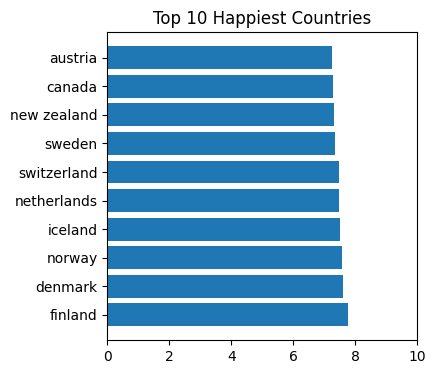

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

top_happy = df.nlargest(10, 'Happiness Score')

plt.figure(figsize = (4,4))
plt.barh(top_happy['Country'], top_happy['Happiness Score'])
plt.title('Top 10 Happiest Countries')
plt.xlim(0, 10)

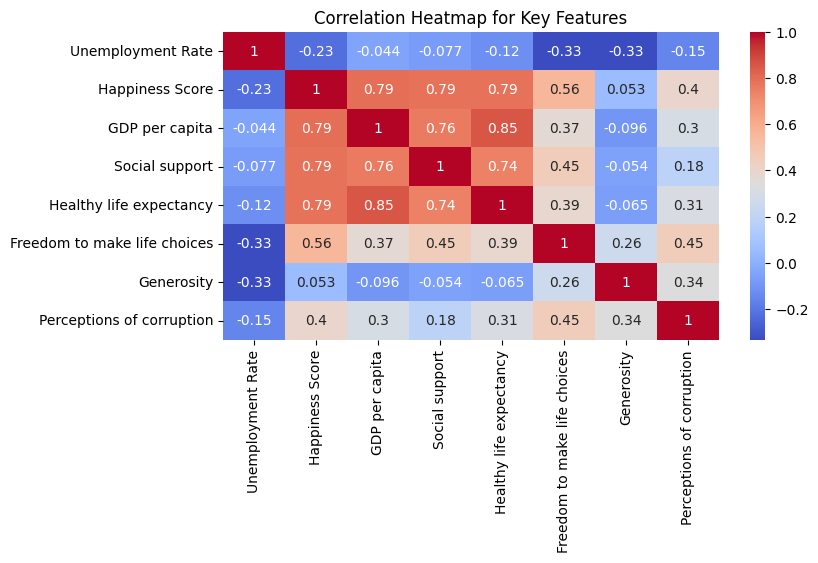

In [19]:
df_numeric = df.drop(columns=['Country', 'Country Code'])

plt.figure(figsize = (8,4))
sns.heatmap(df_numeric.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap for Key Features')
plt.show()